In [3]:
%cd /Users/jye98/Desktop/dataset/imagedata

/Users/jye98/Desktop/dataset/imagedata


In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
import os

In [5]:
image_datas = glob.glob('./**/*.jpg')
class_name = ["StyleGAN3", "RealImage"]
dic = {"StyleGAN3":0, "RealImage":1}

In [6]:
x = []
y = []
for imagename in image_datas:
    image = Image.open(imagename)
    image = image.resize((384,384))
    image = np.array(image)
    x.append(image)
    label = imagename.split(('/'),maxsplit=2)[1]
    label = dic[label]
    y.append(label)

In [7]:
x = np.array(x)
y = np.array(y)

In [8]:
train_images, test_images, train_labels, test_labels = train_test_split(x, y, test_size=0.3, shuffle= True, random_state=777)
train_labels = train_labels[..., tf.newaxis]
test_labels = test_labels[..., tf.newaxis]

test_images.shape, test_labels.shape, train_images.shape, train_labels.shape

((498, 384, 384, 3), (498, 1), (1160, 384, 384, 3), (1160, 1))

In [9]:
#training set의 각 class 별 image 수 확인
unique, counts = np.unique(np.reshape(train_labels, (1160,)), axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 576, 1: 584}

In [10]:
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0] 

In [11]:
train_images = train_images.astype(np.int32) / 255.
test_images = test_images.astype(np.int32) / 255.
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [12]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(1160, 384, 384, 3) (1160, 2)
(498, 384, 384, 3) (498, 2)


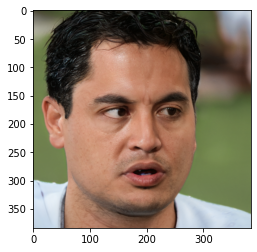

In [13]:
plt.imshow(test_images[0])

In [14]:
N_EPOCHS = 20
N_BATCH = 4
N_CLASS = 5

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labels)).shuffle(buffer_size=1243).batch(N_BATCH).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(N_BATCH)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-26 12:34:39.714090: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-26 12:34:39.715351: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.applications import DenseNet201
import tensorflow as tf
tf.keras.applications.DenseNet201(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000
)

import matplotlib.pyplot as plt
import math

In [17]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import binary_crossentropy
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

import matplotlib.pyplot as plt
import math

In [19]:
densenet201_base = DenseNet201(weights='imagenet',
                            include_top = False,
                            input_shape = (384,384,3))

model = models.Sequential()
model.add(densenet201_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

for layer in densenet201_base.layers:
    layer.trainable = False

for layer in densenet201_base.layers[15:]:
    layer.trainable = True
    
loss = binary_crossentropy
model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

densenet201_base.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 384, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 390, 390, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 192, 192, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                       

In [20]:
steps_per_epoch = math.ceil(N_TRAIN/N_BATCH)
validation_steps = math.ceil(N_TEST/N_BATCH)
print(steps_per_epoch, validation_steps)

290 125


In [21]:
hist = model.fit(train_dataset, epochs=N_EPOCHS,steps_per_epoch=steps_per_epoch,validation_data=test_dataset,validation_steps=validation_steps,verbose=1)

Epoch 1/20


2022-05-26 12:38:49.303074: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-26 12:38:49.305578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


290/290 [==============================] - ETA: 0s - loss: 9.6141 - accuracy: 0.5034

2022-05-26 12:41:15.286595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


290/290 [==============================] - 177s 557ms/step - loss: 9.6141 - accuracy: 0.5034 - val_loss: 2.3292 - val_accuracy: 0.5522
Epoch 2/20
290/290 [==============================] - 157s 539ms/step - loss: 1.6092 - accuracy: 0.5362 - val_loss: 13.1545 - val_accuracy: 0.4900
Epoch 3/20
290/290 [==============================] - 157s 540ms/step - loss: 0.9742 - accuracy: 0.5776 - val_loss: 1.0031 - val_accuracy: 0.5622
Epoch 4/20
290/290 [==============================] - 158s 543ms/step - loss: 0.9099 - accuracy: 0.6078 - val_loss: 1.8663 - val_accuracy: 0.5602
Epoch 5/20
290/290 [==============================] - 157s 539ms/step - loss: 0.7431 - accuracy: 0.6517 - val_loss: 2.4232 - val_accuracy: 0.6827
Epoch 6/20
290/290 [==============================] - 158s 544ms/step - loss: 0.6543 - accuracy: 0.6853 - val_loss: 1.3045 - val_accuracy: 0.6245
Epoch 7/20
290/290 [==============================] - 170s 584ms/step - loss: 0.5934 - accuracy: 0.6810 - val_loss: 0.6322 - val_accur

In [22]:
model.evaluate(test_dataset)

125/125 [==============================] - 23s 175ms/step - loss: 9.9468 - accuracy: 0.5562


[9.946805953979492, 0.5562249422073364]

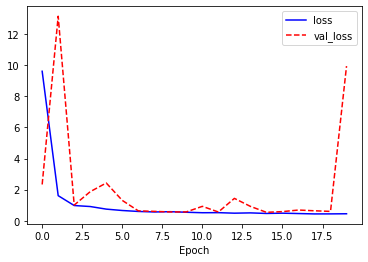

In [23]:
plt.plot(hist.history['loss'], '-b', label ='loss')
plt.plot(hist.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


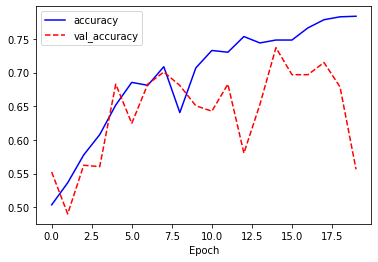

In [24]:
plt.plot(hist.history['accuracy'], 'b-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()